# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import mixture






from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



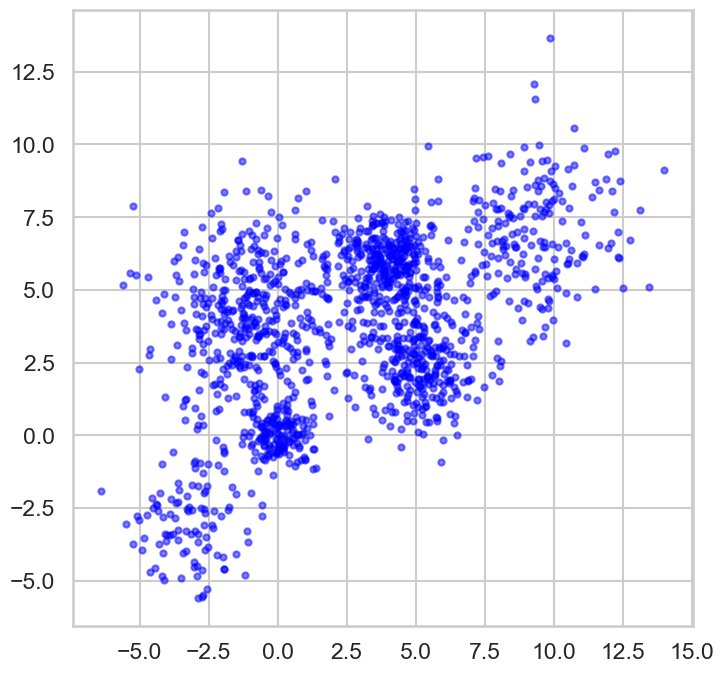

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
df = pd.DataFrame(Multi_blob_Data, columns=['col_1' , 'col_2'])

def get_labels_kmeans (k):
    kmeans_labels_df = pd.DataFrame()
    K =range(1,k+1)

    for i in K:
        kmeans = KMeans(n_clusters= i, random_state=0, n_init=10).fit(Multi_blob_Data)
        label = kmeans.labels_
        kmeans_labels_df [ f'k={i}'] = label.tolist()


    return kmeans_labels_df



In [6]:
kmeans_labels = get_labels_kmeans(10)
kmeans_labels

,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10
0,0,0,1,3,3,0,3,4,7,5
1,0,0,1,3,3,0,3,4,7,5
2,0,0,1,3,3,0,3,4,7,5
3,0,0,1,3,3,0,3,4,8,4
4,0,0,1,3,3,0,3,4,7,5
...,...,...,...,...,...,...,...,...,...,...
1445,0,1,0,1,2,3,1,7,6,1
1446,0,1,0,1,2,3,1,2,2,8
1447,0,1,0,1,2,3,1,2,2,8
1448,0,1,0,1,4,1,2,6,2,3


In [7]:
def plot_kmeans(df_test):
    figure, axis = plt.subplots(2, int(df_test.columns.size /2 ) )
    # kmeans_labels_df = get_labels_kmeans(10)
    for i in range(0,2):
        for j in range (0,5):
            axis[i,j].scatter(df['col_1'] , df['col_2'] , c = df_test[f'k={j+1+5*i}'])


    plt.show()

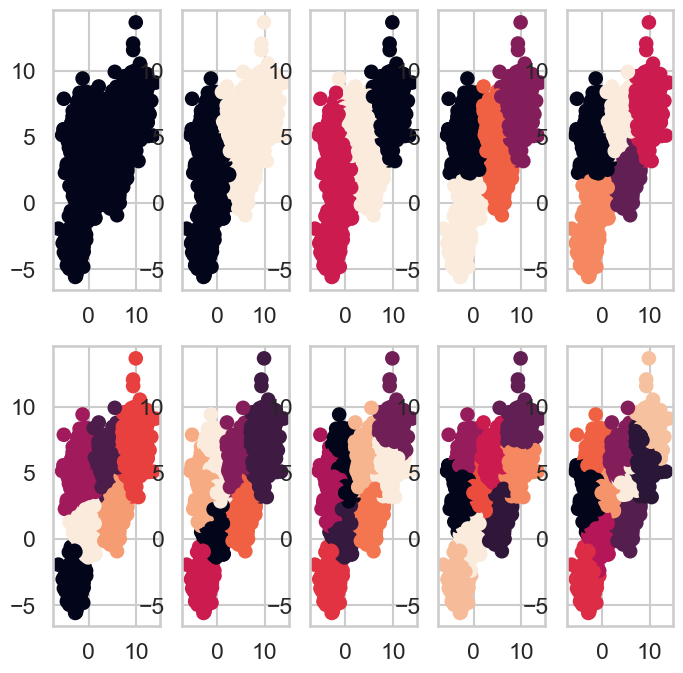

In [8]:

plot_kmeans(get_labels_kmeans(10))

In [9]:

distortions=[]
mapping1 ={}

def plot_distortion_function(data, num):
    
    K = range(1,num+1)

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(Multi_blob_Data)
        kmeanModel.fit(Multi_blob_Data)

        distortions.append(sum(np.min(cdist(Multi_blob_Data, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / Multi_blob_Data.shape[0])
        mapping1[k] = sum(np.min(cdist(Multi_blob_Data, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / Multi_blob_Data.shape[0]

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()    

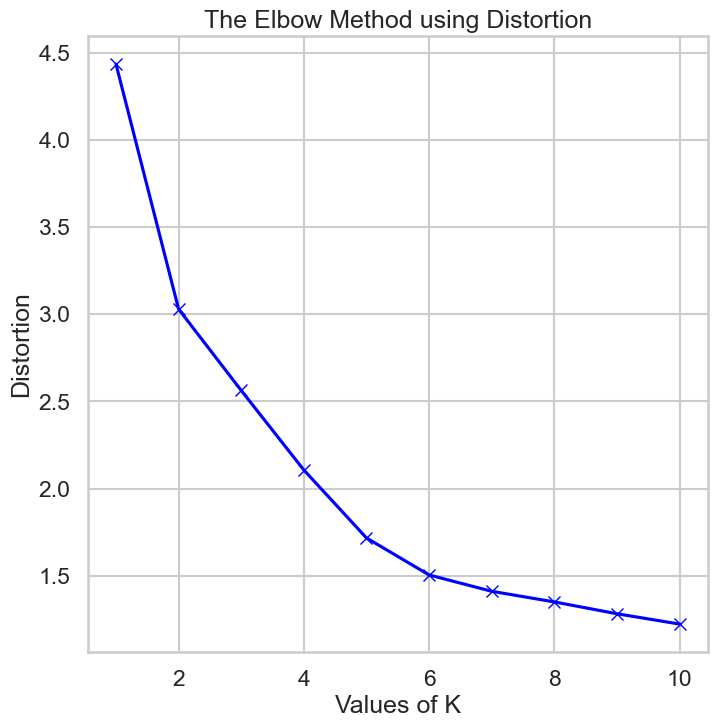

In [10]:
plot_distortion_function(Multi_blob_Data, 10)

In [11]:
  def plot_silhoutte_average(data , labels) :
        range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
        silhouette_avg = []
        for num in range_n_clusters:
             silhouette_avg.append(silhouette_score(data, labels[f'k={num}'])) ; 


        plt.plot(range_n_clusters,silhouette_avg,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Silhouette score') 
        plt.title('Silhouette analysis For Optimal k')
        plt.show()
        

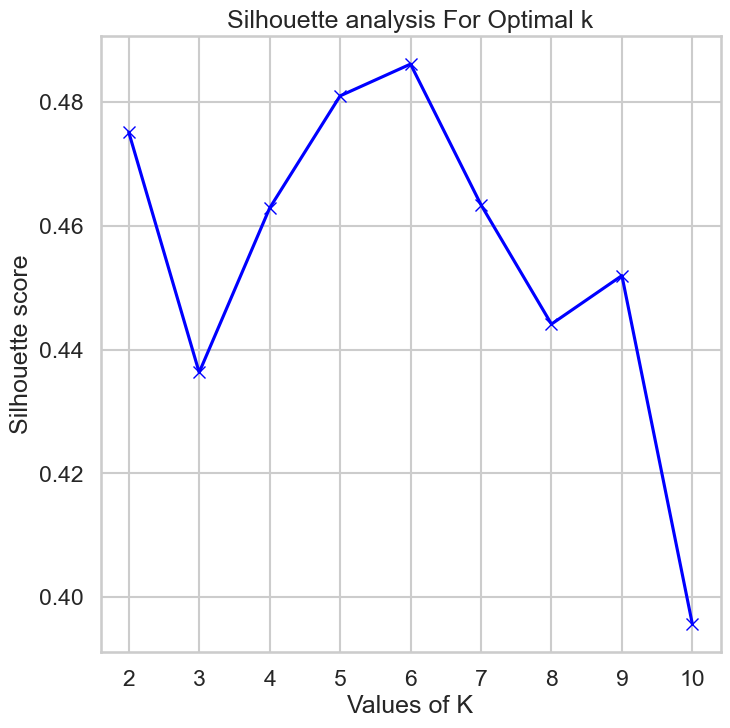

In [12]:
plot_silhoutte_average(Multi_blob_Data, kmeans_labels)

In [13]:
silhouette_score(Multi_blob_Data,kmeans_labels['k=2'])    

0.4751544541991239

### Best k to be chosen is 6 according to elbow method and silhouette score

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [14]:
agglomerative_labels = pd.DataFrame()
affinities = ['euclidean', 'cosine' ,'manhattan' ]
linkages = ['average','single' ]


def get_labels_agglomerative(data, distance_threshold):
    
   

    for i in affinities :
        for j in linkages :
            hierarchical_cluster = AgglomerativeClustering(n_clusters= None, affinity=  i , linkage=  j , distance_threshold=distance_threshold )
            labels2 = hierarchical_cluster.fit_predict(data)
            #print(len(labels2))
            agglomerative_labels [f'{i}_{j}'] = labels2.tolist()
    return agglomerative_labels
        



In [15]:
agglomerative_labels = get_labels_agglomerative(Multi_blob_Data, 5)
agglomerative_labels

,euclidean_average,euclidean_single,cosine_average,cosine_single,manhattan_average,manhattan_single
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1445,1,0,0,0,8,0
1446,1,0,0,0,8,0
1447,4,0,0,0,2,0
1448,1,0,0,0,4,0


In [16]:
def plot_agglomerative(data_df ,labels):
    tmp =int(labels.columns.size/2 )
    figure2, axis2 = plt.subplots(2, tmp ) 
    print(tmp)
    # kmeans_labels_df = get_labels_kmeans(10)
    for i in range(0,2):
        for j in range (0,tmp):
            axis2[i,j].scatter(data_df['col_1'] , data_df['col_2'] , c = labels.iloc[:,j+i*tmp])
    plt.show()


3


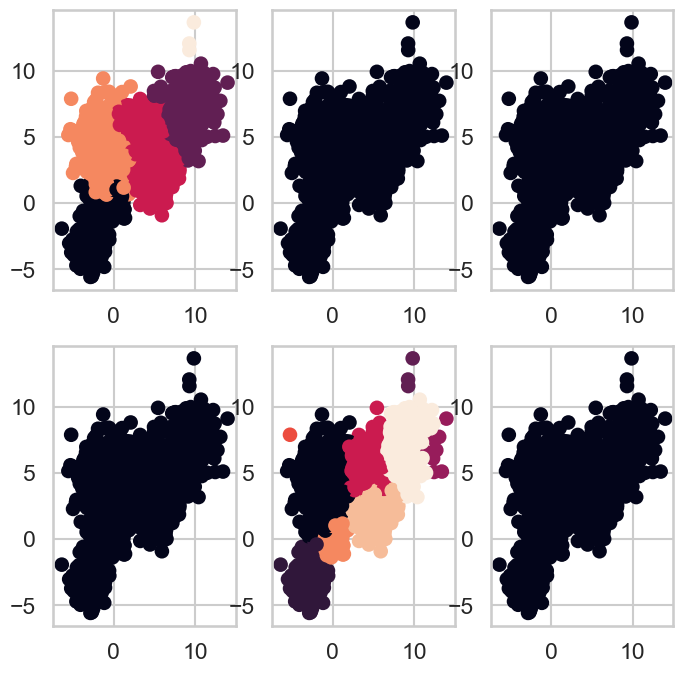

In [17]:
plot_agglomerative(df ,agglomerative_labels )

In [18]:
linkage_data_frame = pd.DataFrame ()

def get_linkage_df(data) :
    linkage_array =[]

    for i in affinities :
        for j in linkages :
            if i != 'manhattan':

                linkage_data = linkage(data, method= j, metric= i)
                #hierarchical_cluster = AgglomerativeClustering(n_clusters= None, affinity=  i , linkage=  j , distance_threshold=5 )
                #labels2 = hierarchical_cluster.fit_predict(Multi_blob_Data)
                #print(len(labels2))
                linkage_array.append(linkage_data)
                #linkage_data_frame[f'{i}_{j}'] = linkage_data.tolist()
    return linkage_array



In [19]:
linkage_array = get_linkage_df(Multi_blob_Data)
print(len(linkage_array))

4


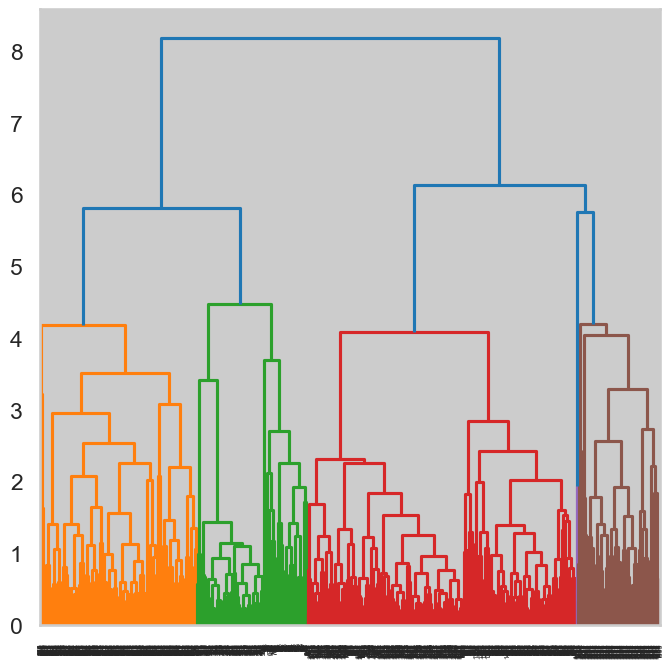

In [20]:
dendrogram(linkage_array[0])
plt.show()

In [21]:
def get_silhouette_score(data , labels):
    
    silhouette_array = []
    for i in range(0, len(labels.columns)) :
        if labels.iloc[:,i].nunique() >= 2 :

            tmp =silhouette_score(data, labels.iloc[:,i])
            silhouette_array .append([tmp , labels.columns[i]])
        else:
            silhouette_array.append([0 , labels.columns[i]])
    return silhouette_array

In [22]:
get_silhouette_score(Multi_blob_Data , agglomerative_labels)

[[0.433187948807373, 'euclidean_average'],
 [0, 'euclidean_single'],
 [0, 'cosine_average'],
 [0, 'cosine_single'],
 [0.399558543983381, 'manhattan_average'],
 [0, 'manhattan_single']]

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [23]:
def get_labels_DBSCAN(min_eps ,max_eps , min_min_samp , max_min_samp , data):
    
    epsilon_array = np.arange(min_eps , max_eps ,0.1)
    min_samples_array = np.arange( min_min_samp, max_min_samp, 1 )
    DBSCAN_labels  = pd.DataFrame()
    for i in epsilon_array:
        for j in min_samples_array:
            db = DBSCAN(eps=i ,  min_samples=j ).fit(data)
            labels_tmp = db.labels_
            DBSCAN_labels [f'eps={i} , min_samples={j}'] = labels_tmp.tolist()
    return DBSCAN_labels        
        
        
# plt.scatter(df['col_1'], df['col_2'], c=labels3)
# plt.show

In [24]:
DBSCAN_labels = get_labels_DBSCAN(0.1 , 3.1 ,5,26, Multi_blob_Data)
DBSCAN_labels

,"eps=0.1 , min_samples=5","eps=0.1 , min_samples=6","eps=0.1 , min_samples=7","eps=0.1 , min_samples=8","eps=0.1 , min_samples=9","eps=0.1 , min_samples=10","eps=0.1 , min_samples=11","eps=0.1 , min_samples=12","eps=0.1 , min_samples=13","eps=0.1 , min_samples=14",...,"eps=3.0000000000000004 , min_samples=16","eps=3.0000000000000004 , min_samples=17","eps=3.0000000000000004 , min_samples=18","eps=3.0000000000000004 , min_samples=19","eps=3.0000000000000004 , min_samples=20","eps=3.0000000000000004 , min_samples=21","eps=3.0000000000000004 , min_samples=22","eps=3.0000000000000004 , min_samples=23","eps=3.0000000000000004 , min_samples=24","eps=3.0000000000000004 , min_samples=25"
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1446,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1447,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,-1
1448,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
DBSCAN_array = get_silhouette_score(Multi_blob_Data,DBSCAN_labels)
    

In [26]:
DBSCAN_np_array = np.array(DBSCAN_array)

max_silhouette = max(DBSCAN_np_array[:,0]) 
index_of_max_silhouette = np.argmax(DBSCAN_np_array[:,0])
print (DBSCAN_array[index_of_max_silhouette])

        

[0.4685207355522043, 'eps=2.1 , min_samples=6']


###  parameters that gets max silhouette score :  epsilon = 2.1  , min samples= 6
        

<function matplotlib.pyplot.show(close=None, block=None)>

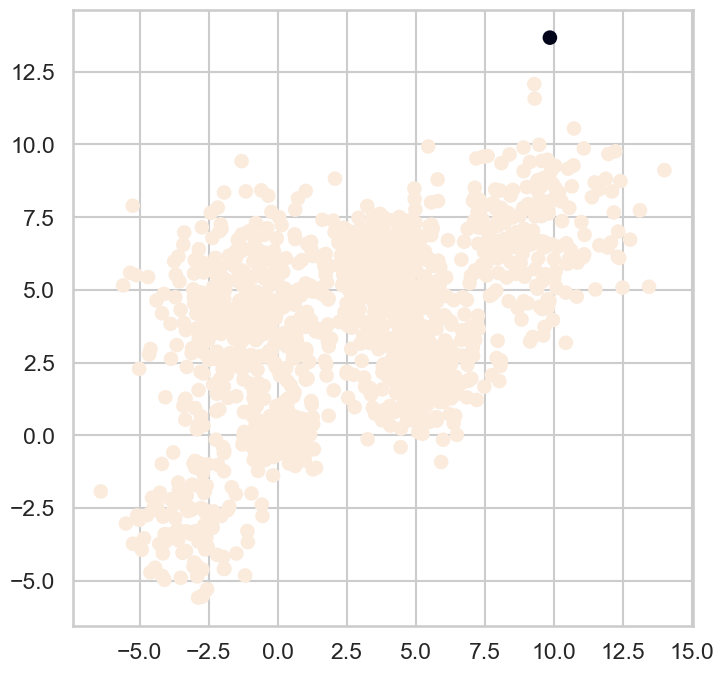

In [27]:
plt.scatter(df['col_1'], df['col_2'], c= DBSCAN_labels['eps=2.1 , min_samples=6'])
plt.show

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [28]:
def get_labels_gmm(data):
    df1 = pd.DataFrame(data, columns=['col_1' , 'col_2'])

    
    gmm_labels =pd.DataFrame()
    covariance_type = ["full","tied","diag","spherical"]
    results = {}
    for cov in covariance_type:
        gmm =  mixture.GaussianMixture(n_components = 2,covariance_type=cov)
        label = gmm.fit_predict(data)
        print(label)
        gmm_labels[f'{cov}'] = label.tolist()
        plt.scatter(df1['col_1'] , df1['col_2'] , c=label)
        plt.show()
    return gmm_labels    



[1 1 1 ... 0 0 0]


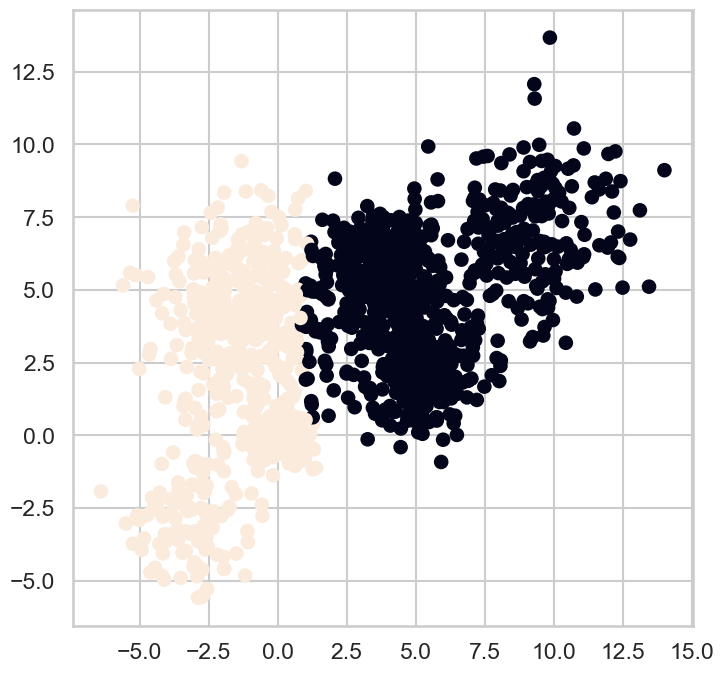

[0 0 0 ... 1 1 1]


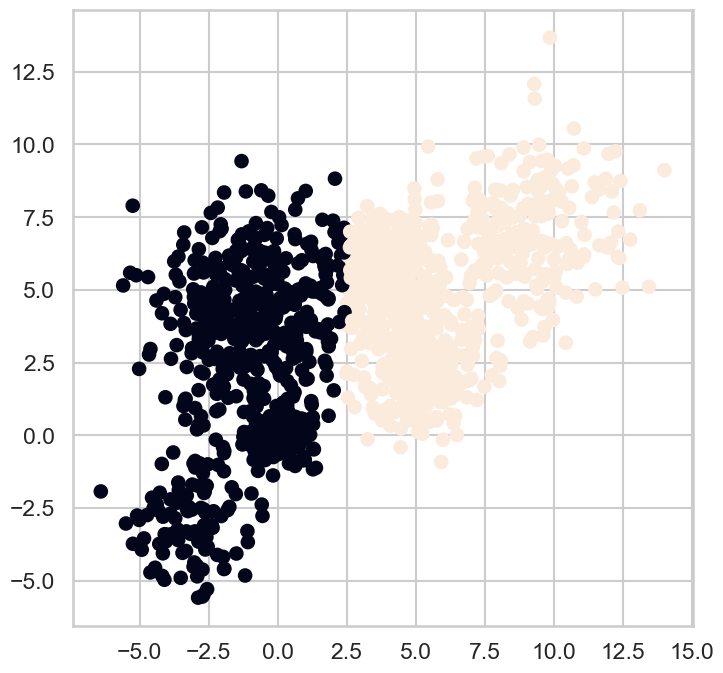

[0 0 0 ... 1 1 1]


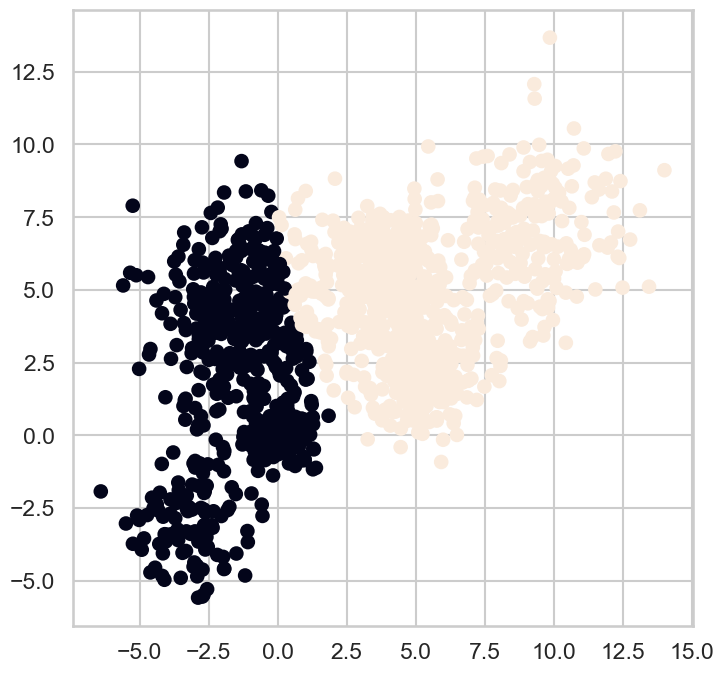

[1 1 1 ... 0 0 0]


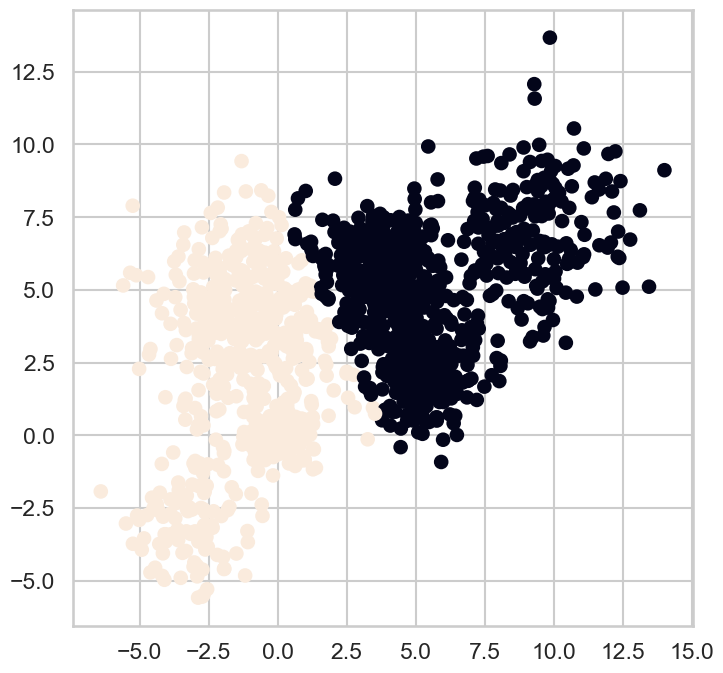

,full,tied,diag,spherical
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
1445,0,1,1,0
1446,0,1,1,0
1447,0,1,1,0
1448,0,1,1,0


In [32]:
get_labels_gmm(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)



* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 